## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table information
mouse_study_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [2]:
# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = mouse_study_complete["Mouse ID"].value_counts()
mouse_count

g989    13
x401    10
g288    10
t565    10
b128    10
        ..
l872     1
f932     1
d133     1
o848     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_by_mouseid = mouse_study_complete.groupby(["Mouse ID","Timepoint"])
grouped_by_mouseid.count()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [5]:
#Get all the data for the duplicate mouse ID. 
dup_mouseid_timepoints = mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID", "Timepoint"])]
dup_mouseid_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_complete.drop_duplicates(subset =["Mouse ID", "Timepoint"])
mouse_study_cleaned                                           

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_check = mouse_study_cleaned["Mouse ID"].value_counts()
mouse_count_check

x401    10
l661    10
s508    10
y260    10
i635    10
        ..
x226     1
v199     1
f932     1
o848     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

### Method One

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [9]:
mouse_study_mean = mouse_study_cleaned.groupby("Drug Regimen").mean()

In [10]:
mouse_study_med = mouse_study_cleaned.groupby("Drug Regimen").median()

In [11]:
mouse_study_var = mouse_study_cleaned.groupby("Drug Regimen").var()

In [12]:
mouse_study_std = mouse_study_cleaned.groupby("Drug Regimen").std()

In [13]:
mouse_study_sem = mouse_study_cleaned.groupby("Drug Regimen").sem()

In [14]:
#Combining the summary tables and renaming the columns
first_merge = pd.merge(mouse_study_mean["Tumor Volume (mm3)"], mouse_study_med["Tumor Volume (mm3)"], on="Drug Regimen")
first_renamed = first_merge.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Mean", "Tumor Volume (mm3)_y":"Tumor Volume Median"})
var_merge = pd.merge(first_renamed, mouse_study_var["Tumor Volume (mm3)"], on="Drug Regimen")
var_renamed = var_merge.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Varience"})
std_merge = pd.merge(var_renamed, mouse_study_std["Tumor Volume (mm3)"], on="Drug Regimen")
std_renamed = std_merge.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Standard Deviation"})
sem_merge = pd.merge(std_renamed, mouse_study_sem["Tumor Volume (mm3)"], on="Drug Regimen")
tumor_volume_summary = sem_merge.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})
tumor_volume_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Varience,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Method Two

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_summary = mouse_study_cleaned.groupby("Drug Regimen")
#Using a single function rather than merging multiple tables
mouse_study_summary["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
# Find the count of mice used for each drug regimen
mouse_study_count = mouse_study_cleaned.groupby(["Drug Regimen"])["Mouse ID"].nunique()
mouse_study_count

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

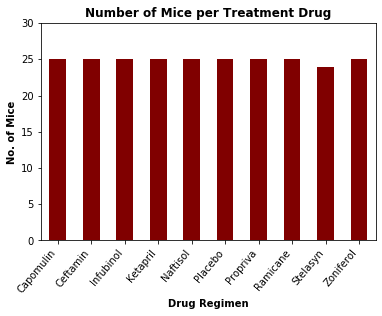

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_study_count.plot(kind="bar", color="maroon", width=.5)
plt.xlabel("Drug Regimen", fontweight="black") 
plt.ylabel("No. of Mice", fontweight="black") 
plt.title("Number of Mice per Treatment Drug", fontweight="black") 
plt.xticks(rotation=50, ha='right')
plt.yticks(np.arange(0, 35, 5))
plt.show()

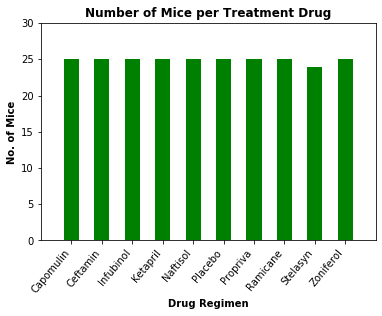

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
all_treatments = mouse_study_cleaned.groupby(["Drug Regimen"])["Mouse ID"].nunique()

# Create a dataframe from the grouped data and reset the index
treatments_and_mice = all_treatments.to_frame().reset_index()

#Plot and customize the bar chart
plt.bar(treatments_and_mice["Drug Regimen"],treatments_and_mice["Mouse ID"], align="center", color="green", width =.5)
plt.xlim(-1, len(all_treatments))
plt.ylim(0, max(treatments_and_mice["Mouse ID"])+5)
plt.xlabel("Drug Regimen", fontweight="black") 
plt.ylabel("No. of Mice", fontweight="black") 
plt.title("Number of Mice per Treatment Drug", fontweight="black") 
plt.xticks(rotation=50, ha='right')
plt.show()


In [22]:
gender_distribution

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

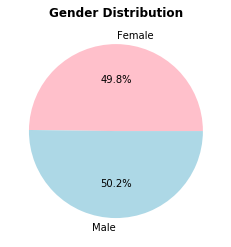

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = mouse_study_cleaned.groupby(["Sex"])["Mouse ID"].nunique()
new_colors = ['pink','lightblue']
gender_distribution.plot(kind="pie", autopct='%1.1f%%', colors=new_colors)
plt.title("Gender Distribution", fontweight="black") 
plt.axis('off')
plt.show()

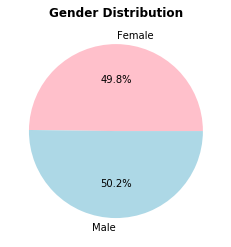

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = "Female","Male"
plt.pie(gender_distribution, labels=genders, autopct='%1.1f%%', colors=new_colors)
plt.title("Gender Distribution", fontweight="black") 
plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin
# Get the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_cleaned.loc[mouse_study_cleaned["Timepoint"] == 45, ["Drug Regimen", "Timepoint"]]
final_treatments = last_timepoint.groupby("Drug Regimen")

In [66]:
#Creates a datafame with the drug regimen list and the last timepoint
mouse_study_last_timepoint = final_treatments.max()
# Merge mouse_study_last_timepoint with the mouse_study_cleaned to get the tumor volume at the last timepoint
mouse_study_final_treatments = pd.merge(mouse_study_last_timepoint, mouse_study_cleaned, on=["Timepoint", "Drug Regimen"])
#Tumor volume for each regimen at the final timepoint
mouse_study_final_treatments[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen"]]

,Mouse ID,Tumor Volume (mm3),Drug Regimen
0,s185,23.343598,Capomulin
1,x401,28.484033,Capomulin
2,m601,28.430964,Capomulin
3,u364,31.023923,Capomulin
4,y793,31.896238,Capomulin
...,...,...,...
125,p136,63.488697,Zoniferol
126,q511,68.611061,Zoniferol
127,q633,70.827796,Zoniferol
128,s337,62.109651,Zoniferol


In [64]:
# Calculate the final tumor volume of each mouse for Capomulin
capomulin_TV = mouse_study_final_treatments.loc[mouse_study_final_treatments["Drug Regimen"] == "Capomulin"]
capomulin_TV[["Mouse ID","Tumor Volume (mm3)"]]

,Mouse ID,Tumor Volume (mm3)
0,s185,23.343598
1,x401,28.484033
2,m601,28.430964
3,u364,31.023923
4,y793,31.896238
5,r554,32.377357
6,m957,33.329098
7,t565,34.455298
8,i738,37.311846
9,w914,36.041047


In [ ]:
# Calculate the final tumor volume of each mouse for Ramicane
ramicane_TV = mouse_study_final_treatments.loc[mouse_study_final_treatments["Drug Regimen"] == "Ramicane"]
#ramicane_TV

In [ ]:
# Calculate the final tumor volume of each mouse for Infubinol
infubinol_TV = mouse_study_final_treatments.loc[mouse_study_final_treatments["Drug Regimen"] == "Infubinol"]
#infubinol_TV

In [ ]:
# Calculate the final tumor volume of each mouse for Ceftamin
ceftamin_TV = mouse_study_final_treatments.loc[mouse_study_final_treatments["Drug Regimen"] == "Ceftamin"]
#ceftamin_TV

In [ ]:
#final_four_treatments = pd.DataFrame

In [ ]:
# Put treatments into a list using for 'for loop' (and later for plot labels)
drug_regimen = mouse_study_cleaned["Drug Regimen"].unique()
treatment_list = [ treatment for treatment in drug_regimen ]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [33]:
# Timepoint and tumor volume data for a mouse using the Capomulin regimen
capomulin_timepoints = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_m957_data = capomulin_timepoints.loc[capomulin_timepoints["Mouse ID"] == "m957"]
capomulin_m957_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,m957,Capomulin,Female,3,19,0,45.000000,0
136,m957,Capomulin,Female,3,19,5,45.622381,1
137,m957,Capomulin,Female,3,19,10,46.414518,1
138,m957,Capomulin,Female,3,19,15,39.804453,1
139,m957,Capomulin,Female,3,19,20,38.909349,1
140,m957,Capomulin,Female,3,19,25,37.695432,1
141,m957,Capomulin,Female,3,19,30,38.212479,1
142,m957,Capomulin,Female,3,19,35,32.562839,1
143,m957,Capomulin,Female,3,19,40,32.947615,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


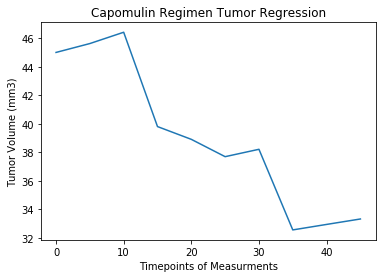

In [34]:
# Line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = capomulin_m957_data["Timepoint"]
y_axis = capomulin_m957_data["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoints of Measurments") 
plt.ylabel("Tumor Volume (mm3)") 
plt.title("Capomulin Regimen Tumor Regression")
plt.show()

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Weight and average tumor volume data for Capomulin regimen
capomulin_data = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_data_avg = capomulin_data.groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean()

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


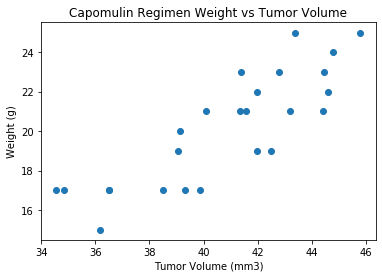

In [28]:
plt.scatter(capomulin_data_avg["Tumor Volume (mm3)"], capomulin_data_avg["Weight (g)"])
plt.xlabel("Tumor Volume (mm3)") 
plt.ylabel("Weight (g)") 
plt.title("Capomulin Regimen Weight vs Tumor Volume")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
